<a href="https://colab.research.google.com/github/DarwinAndrey/Senales_y_sistemas/blob/main/Taller_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta 1**


*   Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transfor- ´
mada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y
discreto y senal en tiempo continuo y discreto. Adem ˜ as, con- ´
sulte en que consiste el algoritmo ´ Fast Fourier Transform -
(FFT) y su utilidad para el calculo de la transformada dis- ´
creta de Fourier. Explique en detalle el algoritmo FFT y su
costo computacional vs el de la transformada discreta. Ver
cuaderno Transformada de Fourier.



# **R1=/**
# **Análisis de Fourier y Algoritmos Relacionados**

## **1. Series y Transformadas de Fourier**

### **1.1 Serie de Fourier (SF)**
Para señales **periódicas y continuas**:

- **Forma Exponencial**:
  $$x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j k \omega_0 t}$$
  - Espectro: Discreto
  - Dominio: Tiempo continuo

- **Forma Trigonométrica**:
  $$x(t) = a_0 + \sum_{k=1}^{\infty} \left[a_k \cos(k\omega_0 t) + b_k \sin(k\omega_0 t)\right]$$
  - Espectro: Discreto

### **1.2 Transformada de Fourier (FT)**
Para señales **no periódicas y continuas**:
$$X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt$$
- Espectro: Continuo
- Dominio: Tiempo continuo

### **1.3 DTFT**
Para señales **discretas**:
$$X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}$$
- Espectro: Continuo y periódico ($2\pi$)
- Dominio: Tiempo discreto

### **1.4 DFT**
Para señales **discretas y finitas**:
$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}kn}$$
- Espectro: Discreto y periódico ($N$)
- Dominio: Tiempo discreto

## **2. Algoritmo FFT**

### **2.1 Concepto**
- Optimización de la DFT
- Reduce complejidad de $O(N^2)$ a $O(N \log N)$
- Usa estrategia "divide y vencerás"

### **2.2 Implementación Práctica**


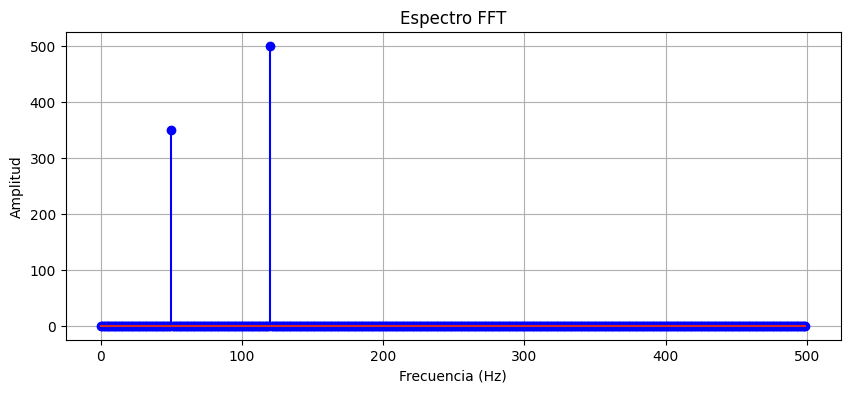

In [ ]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Señal de ejemplo
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)
x = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# Cálculo FFT
X = fft(x)
N = len(X)
freq = np.arange(N) * fs / N

# Visualización
plt.figure(figsize=(10,4))
plt.stem(freq[:N//2], np.abs(X[:N//2]), 'b')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro FFT')
plt.grid()
plt.show()

### **2.3 Comparación de Costo Computacional**

| Complejidad | Operaciones para N=1024 | Operaciones para N=4096 |
|-------------|-------------------------|-------------------------|
| **DFT** ($O(N^2)$) | $1,048,576$ | $16,777,216$ |
| **FFT** ($O(N \log N)$) | $10,240$ | $49,152$ |

**Ejemplo de escalamiento:**
- Para $N = 2^{20}$ (1,048,576 puntos):
  - DFT requeriría $\approx 1.1 \times 10^{12}$ operaciones
  - FFT solo $\approx 21$ millones de operaciones

## **3. Resumen Comparativo**

| **Método** | **Tipo de Señal** | **Espectro** | **Periodicidad** | **Dominio** |
|------------|-------------------|--------------|------------------|-------------|
| SF | Periódica continua | Discreto | En tiempo | $t$ continuo |
| FT | No periódica continua | Continuo | No aplica | $t$ continuo |
| DTFT | Discreta infinita | Continuo (periódico en $2\pi$) | En frecuencia | $n$ discreto |
| DFT | Discreta finita | Discreto (periódico en $N$) | En tiempo y frecuencia | $n$ discreto |

## **4. Aplicaciones Prácticas**

#### **Áreas clave:**
1. **Procesamiento de señales biomédicas**
   - Análisis de ECG/EEG
   - Detección de anomalías cardíacas

2. **Telecomunicaciones**
   - Análisis espectral de señales 5G
   - Diseño de filtros digitales

3. **Procesamiento de imágenes**
   - Compresión JPEG (transformada discreta del coseno)
   - Reconocimiento de patrones

4. **Acústica**
   - Identificación de notas musicales
   - Diseño de ecualizadores

